# Analysis of Pre-Trained Sentiment Models

Storing in separate notebook to avoid re-running all models. 

### General setup

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Load Data from `data_with_sentiment.ipynb` 
- includes data with sentiment already assessed from `sentiment_modeling.ipynb`

In [3]:
# Read in data
data = pd.read_csv('./data_with_sentiment.csv')

# View first two rows of data
data.head(2)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,...,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,emotion_output,hate_probs,hate_output
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...,0.3818,positive,"{'NEG': 0.6141573190689087, 'NEU': 0.378498435...",NEG,"{'others': 0.1764051467180252, 'joy': 0.002714...",disgust,"{'hateful': 0.005217170342803001, 'targeted': ...",[]
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...,0.7351,positive,"{'NEG': 0.01712794601917267, 'NEU': 0.41241669...",POS,"{'others': 0.9740970134735107, 'joy': 0.014058...",others,"{'hateful': 0.008792026899755001, 'targeted': ...",[]


## **1. VADER Sentiment Scores**

### Average VADER Sentiment Scores

In [4]:
### Get the counts of all tweets of each specific category (Abrams, Kemp, Election)

# Explode topics into a single row for each
data['topic'] = data['topic'].apply(lambda x: x.replace(',', ''))
data['topic'] = data['topic'].apply(lambda x: x.split())
topic_counts = data.explode('topic')

# Group by search term topic (kemp, abrams, or election)
topic_counts = topic_counts.groupby(['topic'])['sentiment_score'].mean().reset_index()

# View results
topic_counts

,topic,sentiment_score
0,abrams,-0.024808
1,election,0.018225
2,kemp,0.007445


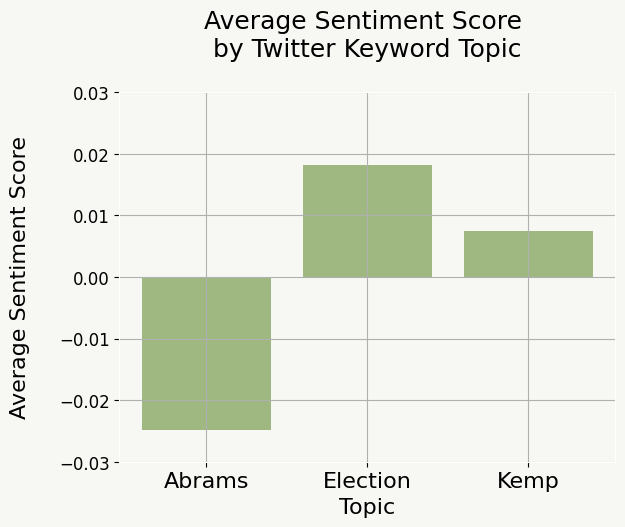

In [5]:
# Plot average sentiment scores for each topic
fig, ax = plt.subplots()
plt.bar(topic_counts['topic'].str.capitalize(), topic_counts['sentiment_score'], color = color1)

# uncomment this to see counts above bars 

# for i in range(len(topic_counts['topic'])):
#     plt.text(i, topic_counts['sentiment_score'][i], np.round(topic_counts['sentiment_score'][i], 3), ha = 'center', size = 12)

plt.xticks(size = 16)
plt.title('Average Sentiment Score \nby Twitter Keyword Topic\n', size = 18)
plt.ylabel('Average Sentiment Score\n', size = 16)
plt.xlabel('Topic')
plt.ylim(-0.03, 0.03)
plt.savefig('../Visualizations/sentAnalysis_sent_avg_score_by_topic.png', bbox_inches='tight')

### Proportion of Tweets per Topic of Each Sentiment Bin

In [6]:
# Get count of tweets by topic
topic_counts = data.explode('topic')
topic_counts_bin = topic_counts.groupby(['topic', 'sentiment_bin']).count().reset_index().rename(columns = {'created_at':'counts'})
topic_counts_bin = topic_counts_bin[['topic', 'sentiment_bin', 'counts']]

In [7]:
# Group tweets by topic and get sums
total_tweets = topic_counts_bin.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

# Merge results with total counts
topic_counts_bin = topic_counts_bin.merge(total_tweets, on = 'topic', how = 'inner')

# Get proportion of tweets by topic
topic_counts_bin['prop'] = topic_counts_bin['counts'] / topic_counts_bin['total_tweets']

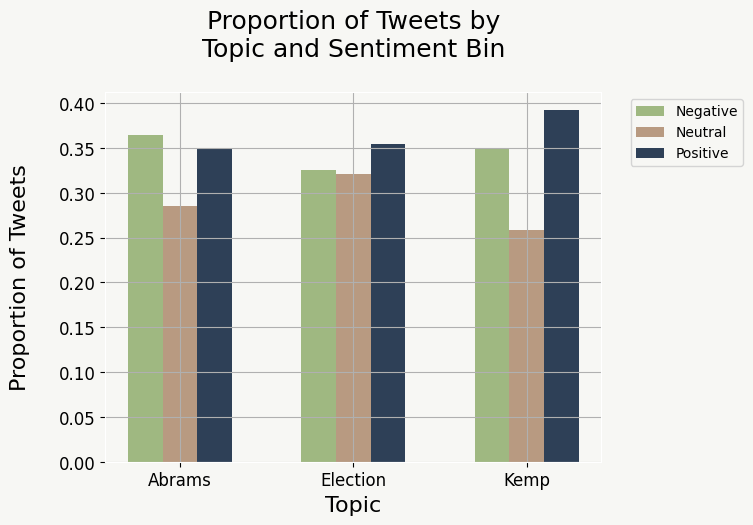

In [8]:
# Plot the proportion of tweets of each topic of each sentiment
fig, ax = plt.subplots()

x = np.arange(len(topic_counts_bin['topic'].unique()))

neg = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'negative']['prop'])
neu = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'neutral']['prop'])
pos = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'positive']['prop'])
width = 0.2

plt.bar(x - 0.2, neg, width = width, color = color1)
plt.bar(x, neu, width = width, color = color2)
plt.bar(x + 0.2, pos, width = width, color = color3)

plt.xticks(x, ['Abrams', 'Election', 'Kemp'],size = 12)
plt.title('Proportion of Tweets by\nTopic and Sentiment Bin\n', size = 18)
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.xlabel('Topic', size=16)
plt.legend(['Negative', 'Neutral', 'Positive'], loc = 'upper right', bbox_to_anchor = (1.3,1))
plt.savefig('../Visualizations/sentAnalysis_sent_prop_by_topic.png', bbox_inches='tight')


## **2. Emotions Scores**

### Proportion of Tweets of Each Emotion per Topic

In [9]:
# Explode dataframe by topic
topic_counts = data.explode('topic')

# Group dataframe to get counts of tweets of each emotion per topic
topic_counts_emotion = topic_counts.groupby(['topic', 'emotion_output']).count().reset_index().rename(columns = {'created_at': 'counts'})

In [10]:
# Filter dataframe to keep only non-other emotions and tweets about either abrams or kemp
topic_counts_emotion_sub = topic_counts_emotion[(topic_counts_emotion['emotion_output'] != 'others') & ((topic_counts_emotion['topic'] == 'abrams') | (topic_counts_emotion['topic'] == 'kemp'))]

# Get total number of tweets for each topic and merge with dataframe
total_tweets = topic_counts_emotion_sub.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})
topic_counts_emotion_sub = topic_counts_emotion_sub.merge(total_tweets, on = 'topic', how = 'inner')

# Calculate the proportion of tweets of each topic of each emotion
topic_counts_emotion_sub['prop'] = topic_counts_emotion_sub['counts'] / topic_counts_emotion_sub['total_tweets']

# Subset dataframe to keep only the topic, emotion, and proportion of tweets
topic_counts_emotion_sub = topic_counts_emotion_sub[['topic', 'emotion_output', 'prop']]

# Sort dataframe by topic and proportion
topic_counts_emotion_sub = topic_counts_emotion_sub.sort_values(['topic', 'prop'])

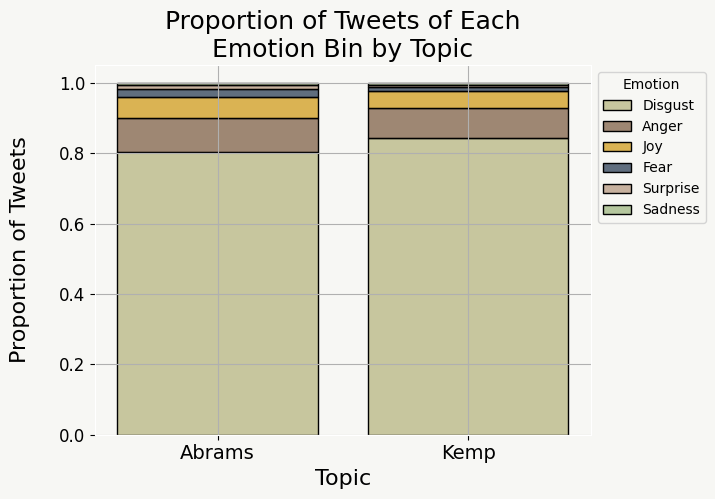

In [22]:
# Plot the distribution of proportions of each emotion for each topic
sns.histplot(
    topic_counts_emotion_sub,
    x = 'topic',
    weights = 'prop',
    hue = 'emotion_output',
    multiple = 'stack',
    palette = [color1, color2, color3, color7, color5, color6],
    shrink = 0.8
)
plt.title('Proportion of Tweets of Each\nEmotion Bin by Topic', fontsize = 18)
plt.ylabel('Proportion of Tweets\n', fontsize = 16)
plt.xlabel('Topic', fontsize = 16)
plt.xticks([0,1], ['Abrams', 'Kemp'], fontsize = 14)
plt.legend(title = 'Emotion', labels = ['Disgust', 'Anger', 'Joy', 'Fear', 'Surprise', 'Sadness'], loc = 2, bbox_to_anchor = (1,1))
plt.savefig('../Visualizations/sentAnalysis_emot_prop_by_topic.png', bbox_inches='tight')

### Proportion of Tweets of Each Emotion per Topic (excluding disgust)

In [12]:
# Filter dataframe to keep only non-other and non-disgust emotions and tweets about either abrams or kemp
topic_counts_emotion_sub_no_dis = topic_counts_emotion[(topic_counts_emotion['emotion_output'] != 'others') & (topic_counts_emotion['emotion_output'] != 'disgust') & ((topic_counts_emotion['topic'] == 'abrams') | (topic_counts_emotion['topic'] == 'kemp'))]

# Get total number of tweets for each topic and merge with dataframe
total_tweets = topic_counts_emotion_sub_no_dis.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})
topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis.merge(total_tweets, on = 'topic', how = 'inner')

# Calculate the proportion of tweets of each topic of each emotion
topic_counts_emotion_sub_no_dis['prop'] = topic_counts_emotion_sub_no_dis['counts'] / topic_counts_emotion_sub_no_dis['total_tweets']

# Subset dataframe to keep only the topic, emotion, and proportion of tweets
topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis[['topic', 'emotion_output', 'prop']]

# Sort dataframe by topic and proportion
topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis.sort_values(['topic', 'prop'], ascending=[True,False])

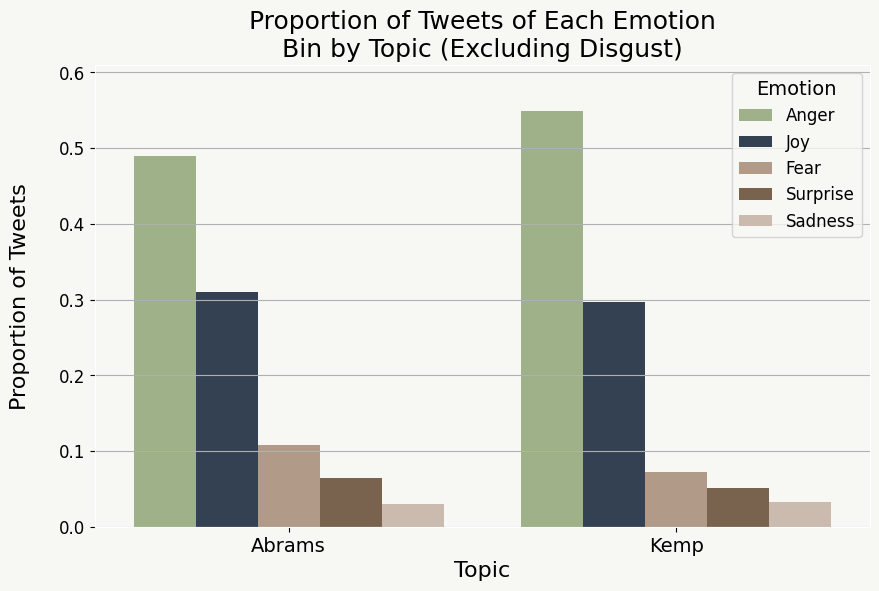

In [24]:
# Plot the distribution of proportions of each emotion for each topic
fig, ax = plt.subplots(figsize=(10, 6))

grouped_topic_plot_df = topic_counts_emotion_sub_no_dis.pivot(index="emotion_output", columns="topic", values="prop")

color_chart = {
    "anger": color1,
    "fear": color2,
    "joy": color3,
    "sadness": color4,
    "surprise": color5,
}
topic_counts_emotion_sub_no_dis['bar_color'] = topic_counts_emotion_sub_no_dis['emotion_output'].apply(lambda x: color_chart[x])
topic_counts_emotion_sub_no_dis['emotion_output_up'] = topic_counts_emotion_sub_no_dis['emotion_output'].apply(lambda x: str.capitalize(x))

sns.barplot(data=topic_counts_emotion_sub_no_dis, 
            x='topic', 
            y='prop', 
            hue='emotion_output_up', 
            palette=topic_counts_emotion_sub_no_dis['bar_color'])
plt.xticks([0,1], ['Abrams', 'Kemp'],size = 14)
plt.title('Proportion of Tweets of Each Emotion\nBin by Topic (Excluding Disgust)', fontsize = 18)
plt.xlabel('Topic', size=16)
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.ylim([0,0.61])
plt.legend(title="Emotion", fontsize=12, title_fontsize=14)
plt.savefig('../Visualizations/sentAnalysis_emot_prop_by_topic_noDisgust.png', bbox_inches='tight')

## **2. Hate Scores**

### Proportion of Tweets of Each Hate Type per Topic

In [14]:
# Explode dataframe by topic
topic_counts = data.explode('topic')

# Group dataframe to get counts of tweets of each hate type per topic
hate_counts = topic_counts.groupby(['topic', 'hate_output']).count().reset_index().rename(columns={'created_at':'counts'})

# Format hate output
hate_counts['hate_output'] = hate_counts['hate_output'].str[1:-1]
hate_counts['hate_output'] = hate_counts['hate_output'].str.replace("'", "").str.split(',')

# Explote dataframe by hate type
hate_counts = hate_counts.explode('hate_output')

In [15]:
# Get total number of tweets for each topic and hate type
hate_counts = hate_counts.groupby(['topic', 'hate_output']).sum().reset_index().rename(columns={'created_at':'counts'}) 

# Drop
hate_counts = hate_counts.drop(index=[4,13])

# Fill in hate output for non-hate speech
hate_counts['hate_output'] = [x if x != '' else 'non-hate' for x in hate_counts['hate_output']]

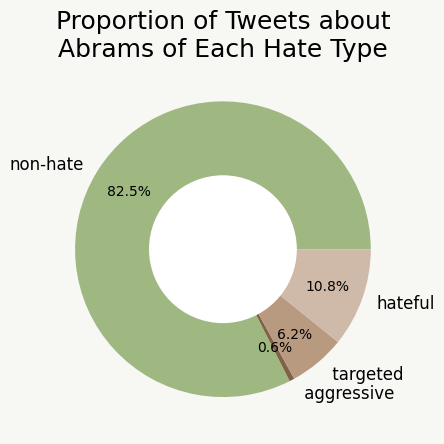

In [16]:
# Plot proportion of tweets of each hate type for tweet about Abrams
plt.pie(hate_counts[hate_counts['topic'] == 'abrams']['counts'], 
                    labels = hate_counts[hate_counts['topic'] == 'abrams']['hate_output'],
                    autopct='%1.1f%%', 
                    pctdistance=0.75, 
                    colors = [color1, color5, color2, color4])
  
# Draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Proportion of Tweets about\nAbrams of Each Hate Type', size = 18)
  
# Save figure
plt.savefig('../Visualizations/sentAnalysis_hate_prop_by_topic_abrams.png', bbox_inches='tight')

# Displaying Chart
plt.show()

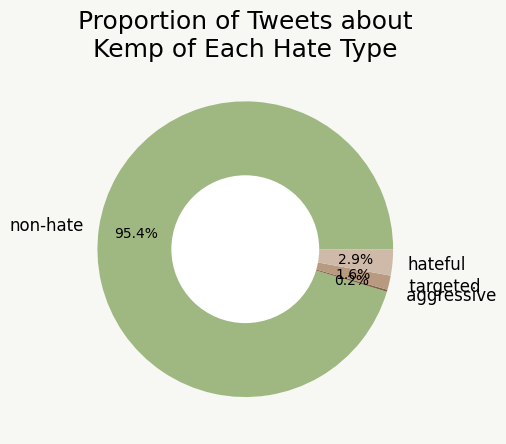

In [17]:
# Plot proportion of tweets of each hate type for tweet about Kemp
plt.pie(hate_counts[hate_counts['topic'] == 'kemp']['counts'], 
                    labels = hate_counts[hate_counts['topic'] == 'kemp']['hate_output'],
                    autopct='%1.1f%%', 
                    pctdistance=0.75, 
                    colors = [color1, color5, color2, color4])
  
# Draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Proportion of Tweets about\nKemp of Each Hate Type', size = 18)
  
# Save figure
plt.savefig('../Visualizations/sentAnalysis_hate_prop_by_topic_kemp.png', bbox_inches='tight')

# Displaying Chart
plt.show()

### Proportion of Tweets of Each Hate Type per Topic (excluding non-hate)

In [18]:
# Group dataframe to get counts of tweets of each hate type per topic
hate_counts_2 = hate_counts.groupby(['topic', 'hate_output']).sum().reset_index().rename(columns={'created_at':'counts'})

# Filter dataframe to exclude those of non-hate type
hate_counts_2 = hate_counts_2[hate_counts_2['hate_output'] != 'non-hate']

# Filter dataframe to look only at tweets about abrams and kemp
hate_counts_2 = hate_counts_2[hate_counts_2['topic'] != 'election']

# Subset dataframe to keep only 3 columns of interest
hate_counts_2 = hate_counts_2[['topic', 'hate_output', 'counts']].reset_index()

# Get total number of tweets of each topic and merge with dataframe
total_tweets = hate_counts_2.groupby('topic').sum().reset_index().rename(columns={'counts':'total_counts'})   
total_tweets = total_tweets[['topic', 'total_counts']]
hate_counts_2 = hate_counts_2.merge(total_tweets, on = 'topic', how = 'inner').drop('index',axis=1)

# Get proportion of tweets of each hate type for each candidate
hate_counts_2['prop'] = hate_counts_2['counts'] / hate_counts_2['total_counts']

# Strip whitespace from hate type categories
hate_counts_2['hate_output'] = hate_counts_2['hate_output'].apply(lambda x: x.strip())

/var/folders/tj/b8x6sk5104794yn7q0kw1wbm0000gn/T/ipykernel_30686/1639323425.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_tweets = hate_counts_2.groupby('topic').sum().reset_index().rename(columns={'counts':'total_counts'})


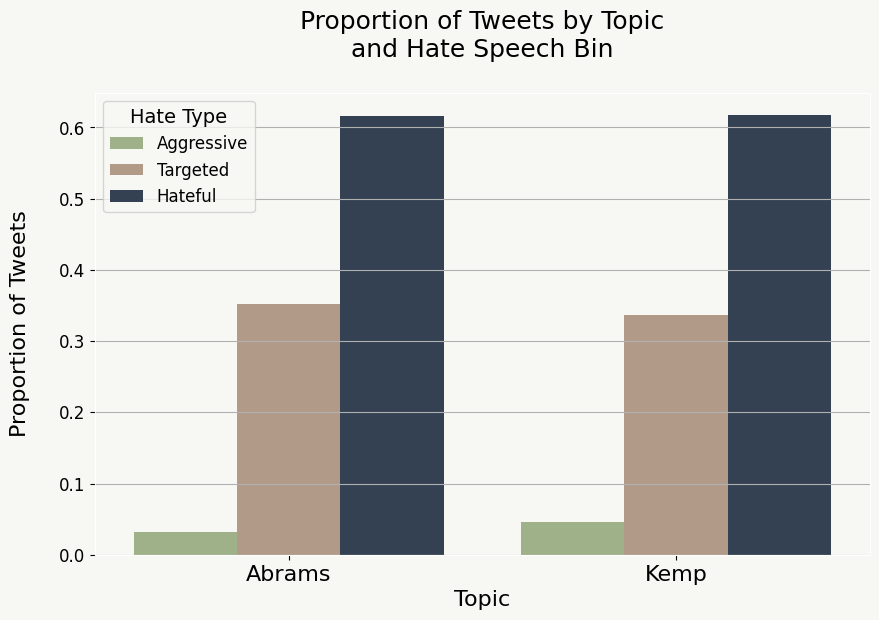

In [19]:
# Plot proportion of comments of each hate type (excluding non-hate) for each topic
fig, ax = plt.subplots(figsize=(10, 6))

# grouped_topic_plot_df = hate_counts_2.pivot(index="emotion_output", columns="topic", values="prop")

color_chart = {
    "aggressive": color1,
    "targeted": color2,
    "hateful": color3,
}
hate_counts_2['bar_color'] = hate_counts_2['hate_output'].apply(lambda x: color_chart[x])
hate_counts_2['hate_output_up'] = hate_counts_2['hate_output'].apply(lambda x: str.capitalize(x))

sns.barplot(data=hate_counts_2, 
            x='topic', 
            y='prop', 
            hue='hate_output_up', 
            palette=hate_counts_2['bar_color'])
plt.xticks([0,1], ['Abrams', 'Kemp'],size = 16)
plt.title('Proportion of Tweets by Topic\nand Hate Speech Bin\n', size = 18)
plt.xlabel('Topic', size=16)
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.legend(title="Hate Type", fontsize=12, title_fontsize=14)
plt.savefig('../Visualizations/sentAnalysis_hate_prop_by_topic_noNonHate.png', bbox_inches='tight')